# Libraries

In [1]:
from pathlib import Path
import numpy as np

from src.visualization import EDAPlotter

# Data Prep

In [2]:
train_path = Path("./data/raw/aug_train.csv")

# Read first line as header
with open(train_path, "r", encoding="utf-8") as f:
    train_header = f.readline().strip().split(",")

train_data = np.genfromtxt(train_path, delimiter=",", skip_header=1, dtype=str)

In [3]:
test_path = Path("./data/raw/aug_test.csv")

# Read first line as header
with open(test_path, "r", encoding="utf-8") as f:
    test_header = f.readline().strip().split(",")

test_data = np.genfromtxt(test_path, delimiter=",", skip_header=1, dtype=str)

In [4]:
# Display first 5 rows
train_data[:5]

array([['8949', 'city_103', '0.92', 'Male', 'Has relevent experience',
        'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1', '36',
        '1.0'],
       ['29725', 'city_40', '0.7759999999999999', 'Male',
        'No relevent experience', 'no_enrollment', 'Graduate', 'STEM',
        '15', '50-99', 'Pvt Ltd', '>4', '47', '0.0'],
       ['11561', 'city_21', '0.624', '', 'No relevent experience',
        'Full time course', 'Graduate', 'STEM', '5', '', '', 'never',
        '83', '0.0'],
       ['33241', 'city_115', '0.789', '', 'No relevent experience', '',
        'Graduate', 'Business Degree', '<1', '', 'Pvt Ltd', 'never',
        '52', '1.0'],
       ['666', 'city_162', '0.767', 'Male', 'Has relevent experience',
        'no_enrollment', 'Masters', 'STEM', '>20', '50-99',
        'Funded Startup', '4', '8', '0.0']], dtype='<U23')

# EDA

## Overall

What is the target column?

In [5]:
set(train_header) - set(test_header)

{'target'}

How long is the training set? How long is the test set?

In [6]:
print(len(train_data))
print(len(test_data))

19158
2129


Which features are numerical/categorical?

In [7]:
print("Feature names:", train_header)
print("Sample:", train_data[6])

Feature names: ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']
Sample: ['28806' 'city_160' '0.92' 'Male' 'Has relevent experience'
 'no_enrollment' 'High School' '' '5' '50-99' 'Funded Startup' '1' '24'
 '0.0']


Almost features are categorical. Maybe *training_hours*, *city_development_index* is numerical.

Let check unique values in each feature.

In [8]:
for i, feature in enumerate(train_header):
    unique_values = set(train_data[:, i])
    print(
        f"Feature '{feature}' has {len(unique_values)} unique values: {unique_values}"
    )

Feature 'enrollee_id' has 19158 unique values: {'15777', '11194', '24006', '23459', '3834', '31631', '21602', '15676', '33046', '26485', '28430', '15505', '32317', '14318', '20678', '4167', '23490', '14197', '31873', '12679', '32901', '16503', '3430', '2701', '29824', '17684', '30080', '15705', '12118', '27585', '26768', '19649', '8460', '26868', '22847', '17672', '1034', '25002', '33109', '16898', '5193', '22238', '6622', '7673', '19007', '16021', '9281', '28245', '11715', '30950', '4840', '25021', '27885', '15052', '948', '5045', '31678', '22192', '32804', '4380', '19874', '30514', '26794', '16859', '15738', '12534', '4877', '6770', '18410', '5095', '31030', '32657', '26815', '32972', '20439', '13937', '6605', '7362', '9126', '29737', '11318', '22142', '1615', '30467', '33047', '18094', '2103', '23431', '726', '11383', '29945', '16248', '23367', '30452', '24089', '29786', '1636', '28458', '4853', '8776', '6208', '32188', '29509', '758', '12648', '21723', '6879', '19515', '25483', '27

How many missing values are there in each feature?

In [9]:
for i, feature in enumerate(train_header):
    missing_count = np.sum(train_data[:, i] == "")
    print(f"Feature '{feature}' has {missing_count} missing values. Percentage: {missing_count / len(train_data) * 100:.2f}%")

Feature 'enrollee_id' has 0 missing values. Percentage: 0.00%
Feature 'city' has 0 missing values. Percentage: 0.00%
Feature 'city_development_index' has 0 missing values. Percentage: 0.00%
Feature 'gender' has 4508 missing values. Percentage: 23.53%
Feature 'relevent_experience' has 0 missing values. Percentage: 0.00%
Feature 'enrolled_university' has 386 missing values. Percentage: 2.01%
Feature 'education_level' has 460 missing values. Percentage: 2.40%
Feature 'major_discipline' has 2813 missing values. Percentage: 14.68%
Feature 'experience' has 65 missing values. Percentage: 0.34%
Feature 'company_size' has 5938 missing values. Percentage: 30.99%
Feature 'company_type' has 6140 missing values. Percentage: 32.05%
Feature 'last_new_job' has 423 missing values. Percentage: 2.21%
Feature 'training_hours' has 0 missing values. Percentage: 0.00%
Feature 'target' has 0 missing values. Percentage: 0.00%


## Plotting

Is the data balanced?

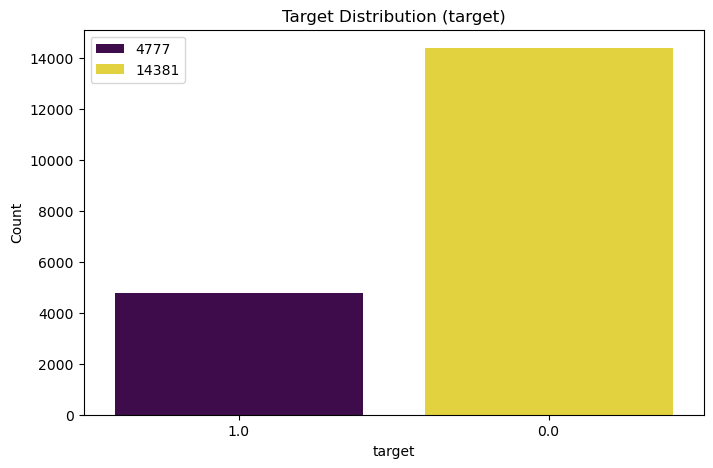

In [10]:
EDAPlotter.plot_target_distribution(train_data[:, -1], "target")

How the numerical features distributed with respect to the target variable?

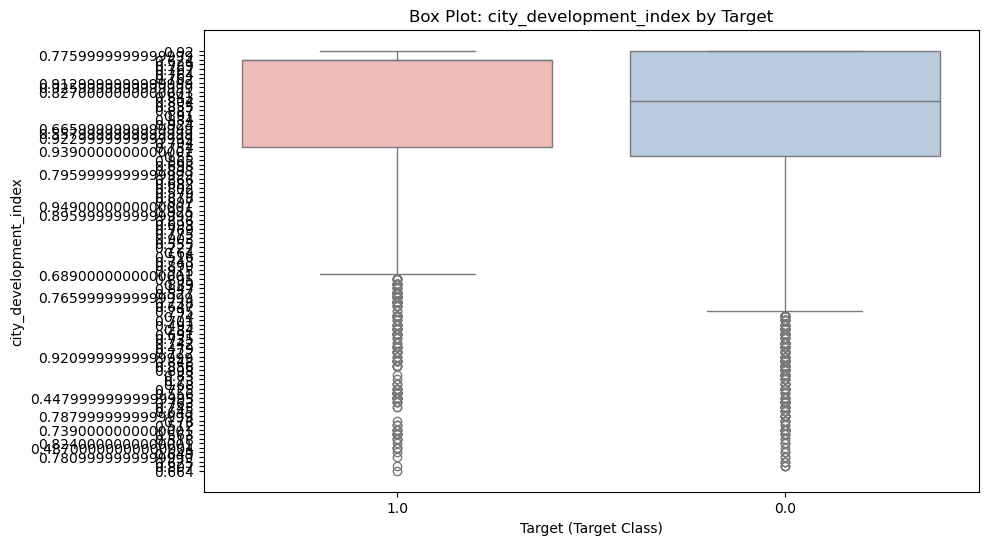

In [11]:
EDAPlotter.plot_numerical_vs_target(
    num_data=train_data[:, train_header.index("city_development_index")],
    target_data=train_data[:, train_header.index("target")],
    num_col_name="city_development_index",
)

Check violinplot

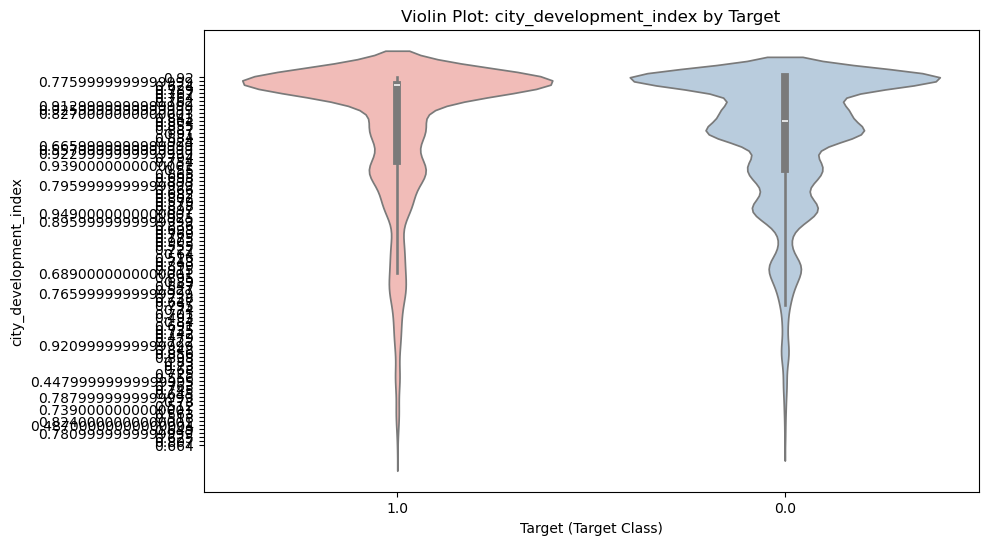

In [12]:
EDAPlotter.plot_numerical_vs_target(
    num_data=train_data[:, train_header.index("city_development_index")],
    target_data=train_data[:, train_header.index("target")],
    num_col_name="city_development_index",
    plot_type="violin"
)

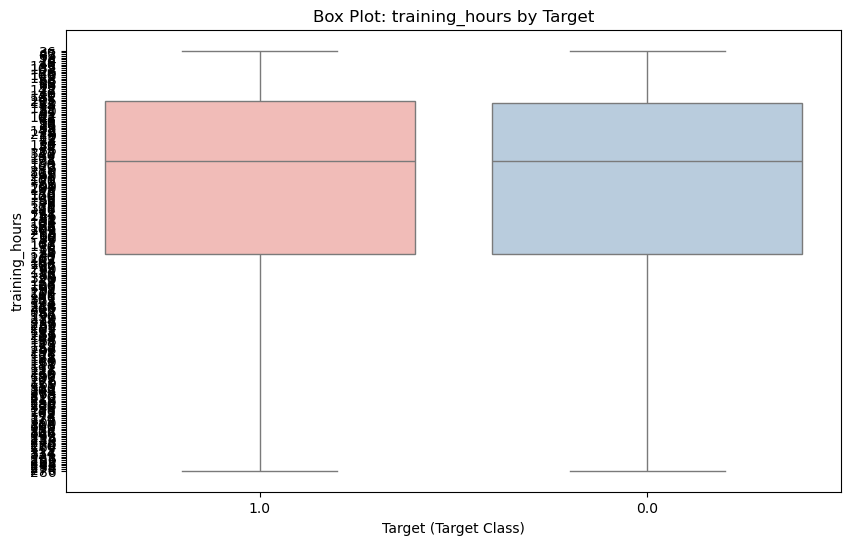

In [13]:
EDAPlotter.plot_numerical_vs_target(
    num_data=train_data[:, train_header.index("training_hours")],
    target_data=train_data[:, train_header.index("target")],
    num_col_name="training_hours",
)

How the categorical features distributed with respect to the target variable?

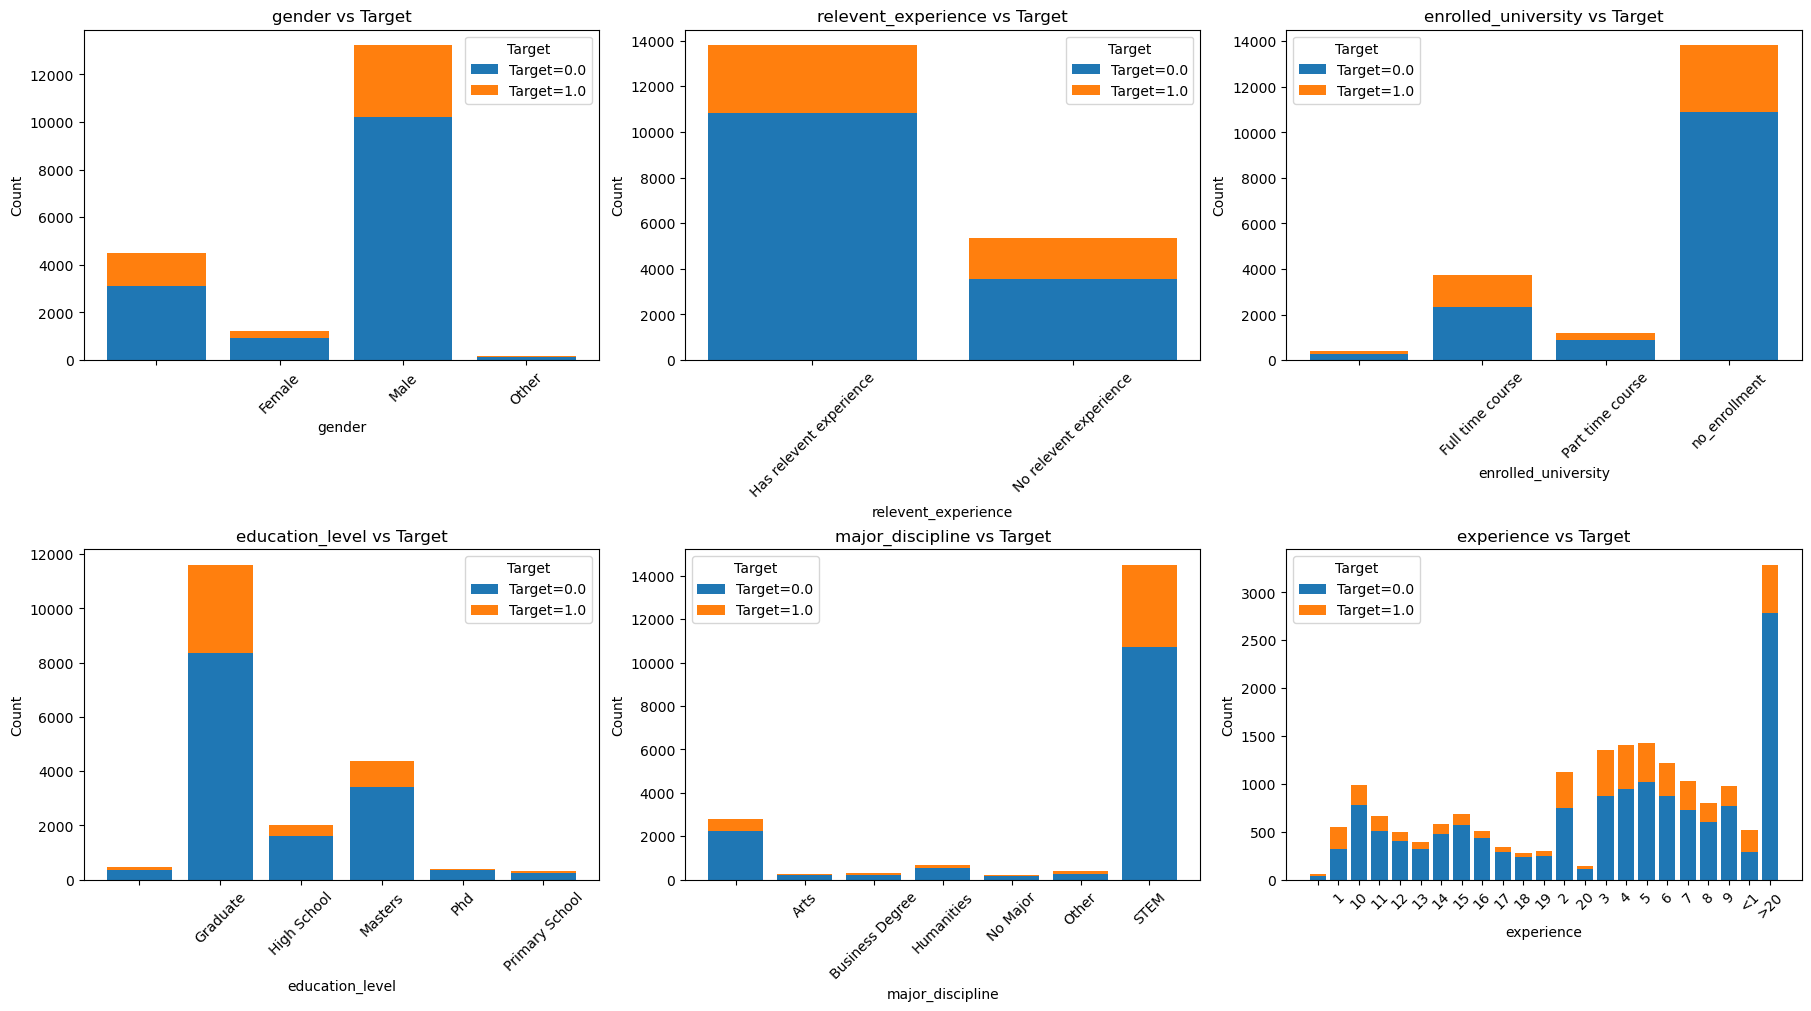

In [14]:
cat_data = train_data[:, [train_header.index(col) for col in [
    "gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience"
]]]
target_data = train_data[:, train_header.index("target")]
cat_col_names = [
    "gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience"
]

EDAPlotter.plot_categorical_vs_target(
    cat_data=cat_data,
    target_data=target_data,
    cat_col_names=cat_col_names,
)

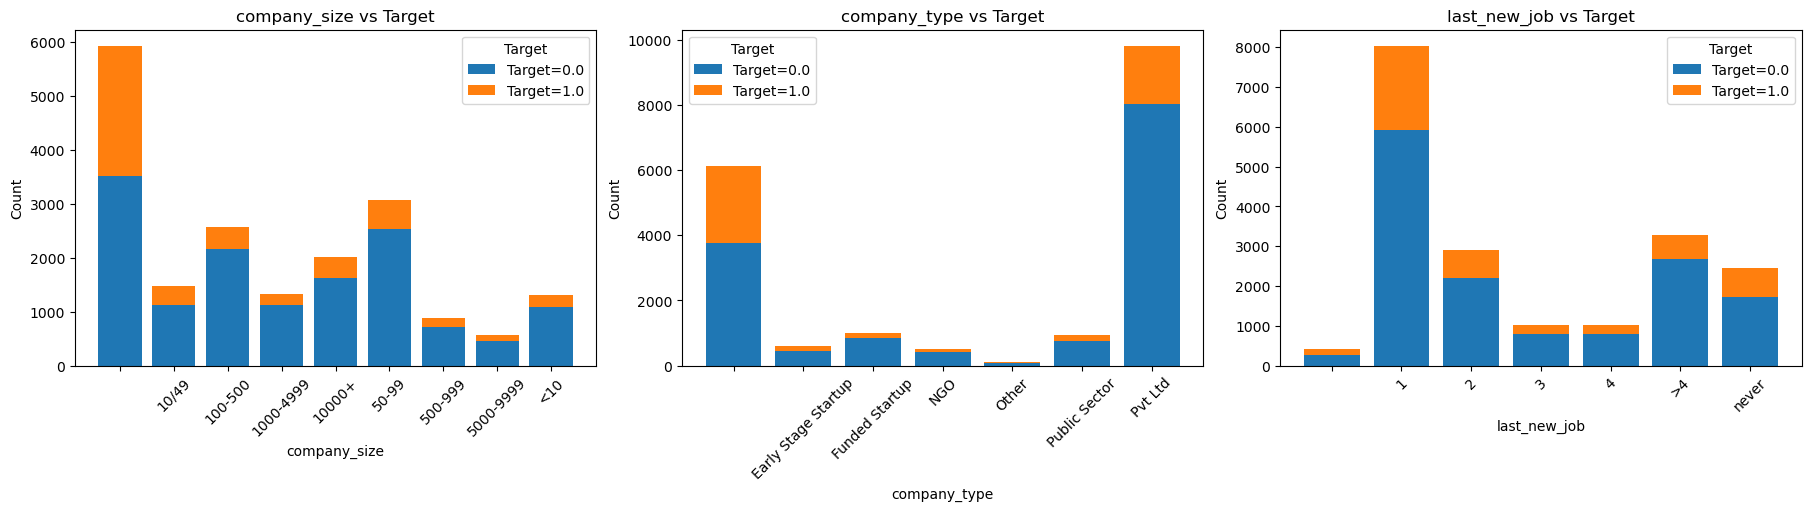

In [17]:
cat_data = train_data[:, [train_header.index(col) for col in [
    "company_size", "company_type", "last_new_job"
]]]
target_data = train_data[:, train_header.index("target")]
cat_col_names = [
    "company_size", "company_type", "last_new_job"
]

EDAPlotter.plot_categorical_vs_target(
    cat_data=cat_data,
    target_data=target_data,
    cat_col_names=cat_col_names,
)

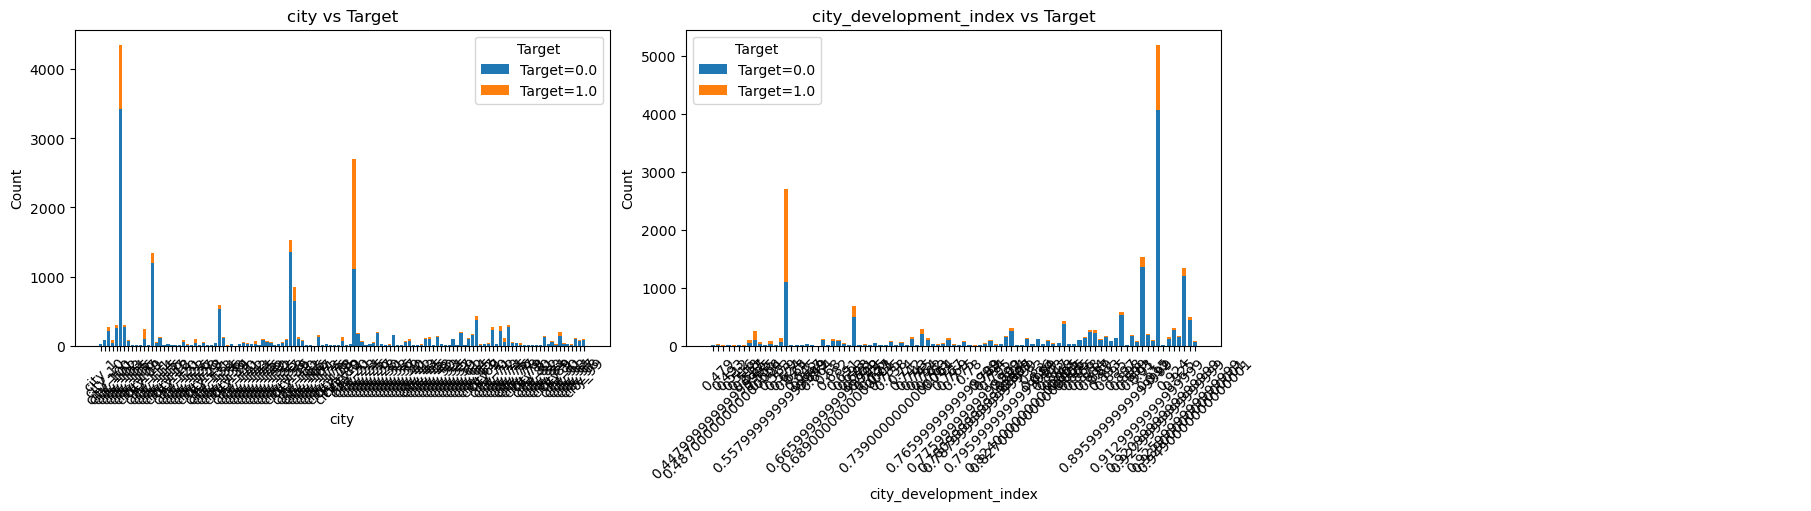

In [18]:
cat_data = train_data[:, [train_header.index(col) for col in [
    "city", "city_development_index"
]]]
target_data = train_data[:, train_header.index("target")]
cat_col_names = [
    "city", "city_development_index"
]

EDAPlotter.plot_categorical_vs_target(
    cat_data=cat_data,
    target_data=target_data,
    cat_col_names=cat_col_names,
)

# Insight

- Feature *city* and *city_development_index* are paired. If we know the *city*, we can know the *city_development_index* exactly. So we can drop one of them to avoid redundancy.
- Feature *company_type*, *company_size*, *gender* has many missing values. We can consider to drop this feature or impute the missing values (treat missing as a separate category).
- Feature *enrollee_id* is just an identifier, it does not provide any information. We can drop this feature.
- Some features like *experience*, *major_discipline* have dominant categories. We can consider to group the less frequent categories into an "Other" category.
- **Data Imbalance**: The target variable is imbalanced. We may need to use some techniques to handle the imbalance during model training, such as oversampling the minority class, undersampling the majority class, or using SMOTE.
- With mostly categorical features, using tree-based models (like Random Forest, Gradient Boosting) might be more effective than linear models but it difficult to build. So I will go with Naive Bayes.

# Conclusion

Because only categorical features have missing values, imputation strategies for missing values are:
- For *gender*, *company_size*, *company_type* (>20% missing): treat missing as a separate category.
- Others: impute with mode 